In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/bottle-updated.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [ ]:
dataset.isnull().sum().sort_values()

Unnamed: 0        0
Depthm            0
T_degC        10963
Salnty        47354
dtype: int64

In [ ]:
avg_tdeg = dataset['T_degC'].astype('float').mean(axis=0)
avg_Salnty = dataset['Salnty'].astype('float').mean(axis=0)

dataset['T_degC'].replace(np.nan, avg_tdeg, inplace=True)
dataset['Salnty'].replace(np.nan, avg_Salnty, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  864863 non-null  int64  
 1   Depthm      864863 non-null  int64  
 2   T_degC      864863 non-null  float64
 3   Salnty      864863 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 26.4 MB


In [ ]:
dataset.isnull().sum().sort_values()

Unnamed: 0    0
Depthm        0
T_degC        0
Salnty        0
dtype: int64

In [ ]:
dataset.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26283a1828>,
      dtype=object)

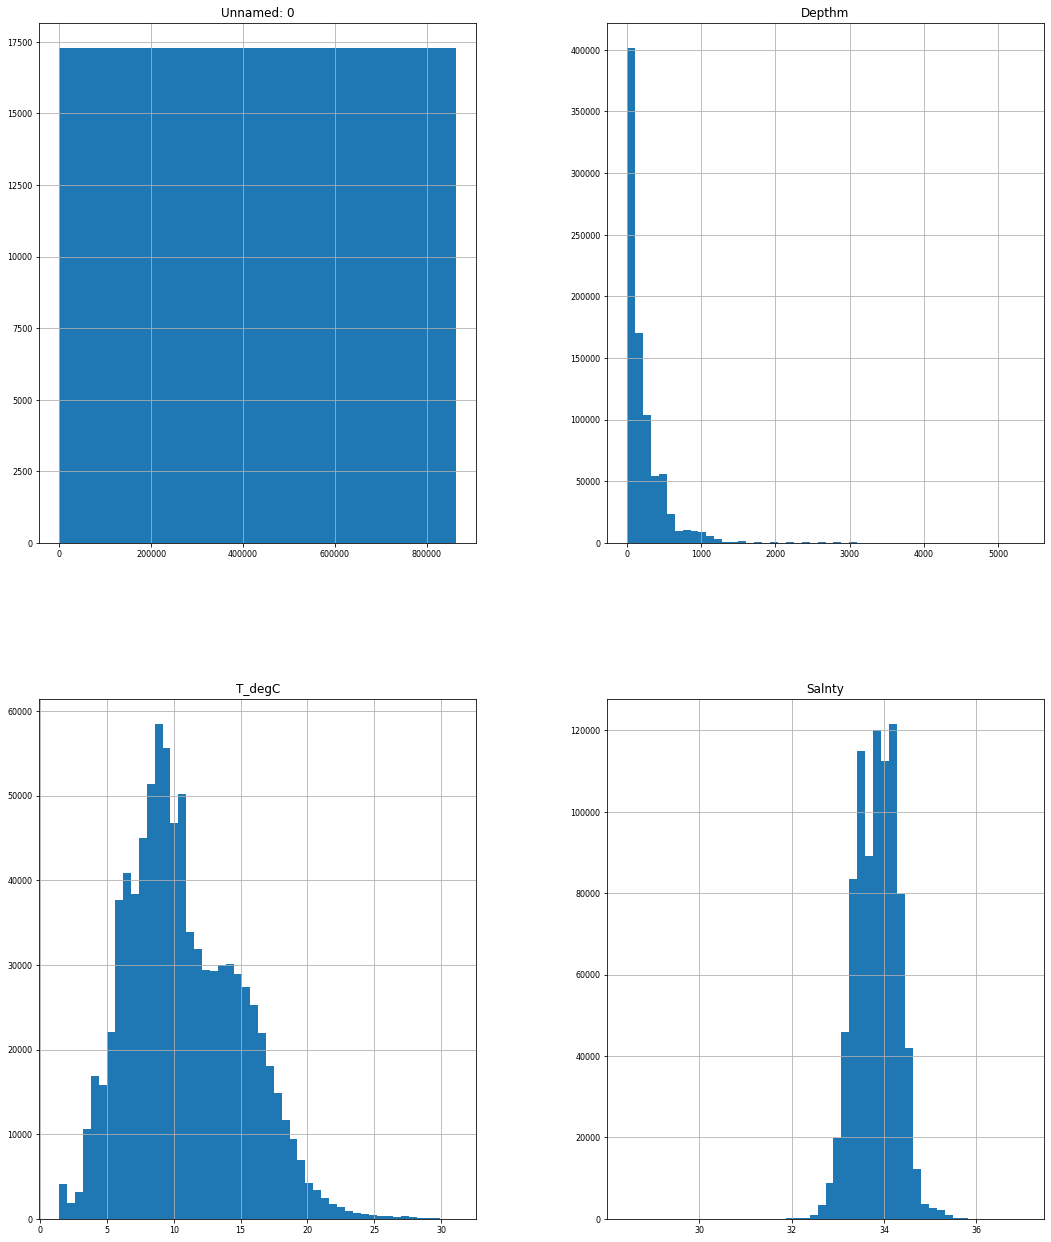

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

corr

,Unnamed: 0,Depthm,T_degC,Salnty
Unnamed: 0,1.000000,-0.161617,0.089581,-0.187243
Depthm,-0.161617,1.000000,-0.678628,0.543326
T_degC,0.089581,-0.678628,1.000000,-0.489967
Salnty,-0.187243,0.543326,-0.489967,1.000000


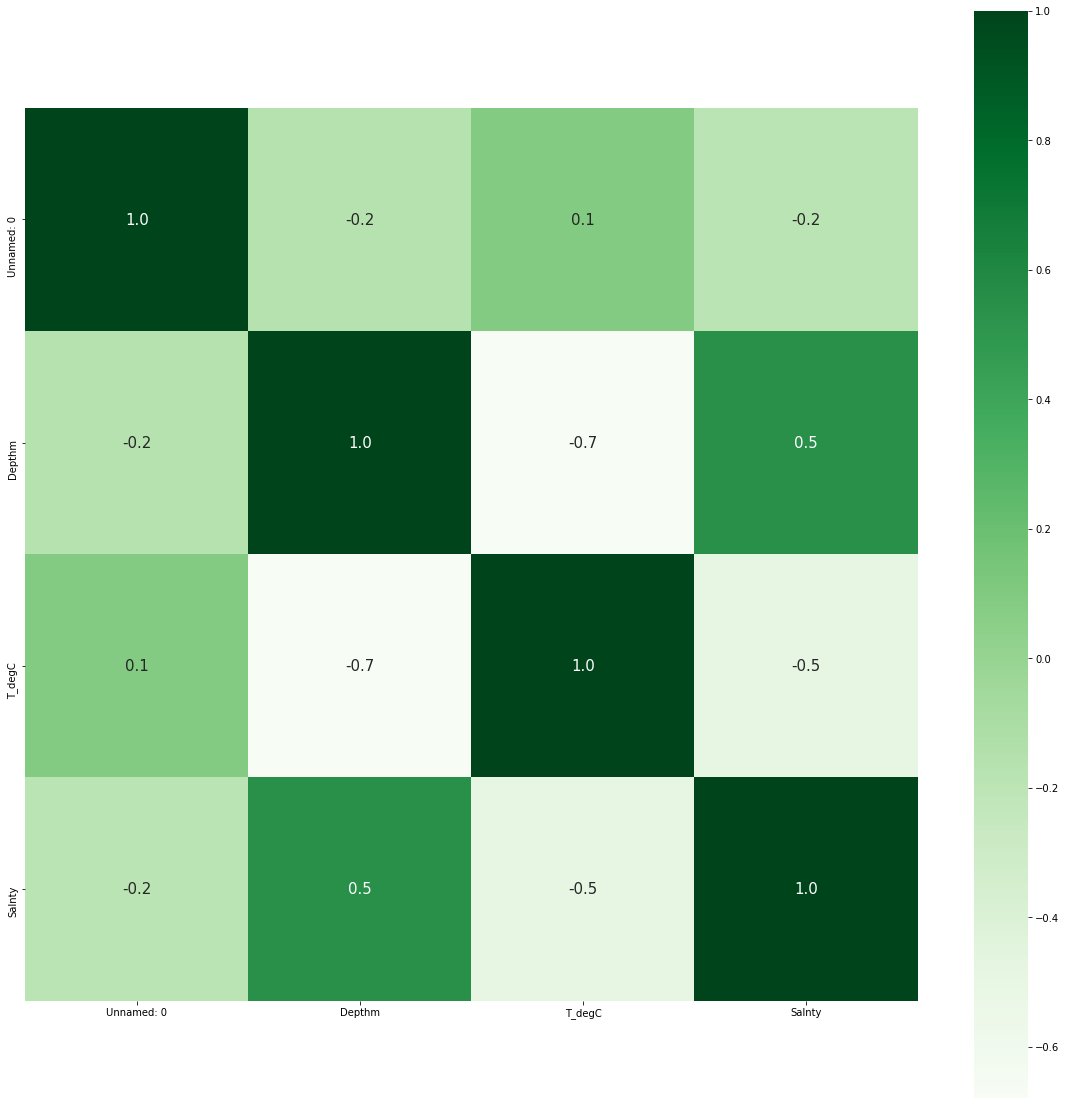

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
label = dataset['Salnty']
features = dataset.drop(['Salnty', 'Unnamed: 0'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.6824194154743307
MAE (Mean Absolute Error) 0.5854803543622852
r^2 score 0.31934354019067523
RMSE (Root Mean Squared Error 0.8260868086795302


# Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history=model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
86487/86487 [==============================] - 82s 953us/step - loss: 0.3924 - val_loss: 0.3893
Epoch 2/50
86487/86487 [==============================] - 83s 963us/step - loss: 0.3856 - val_loss: 0.3965
Epoch 3/50
86487/86487 [==============================] - 82s 951us/step - loss: 0.3854 - val_loss: 0.3901
Epoch 4/50
86487/86487 [==============================] - 82s 948us/step - loss: 0.3852 - val_loss: 0.3877
Epoch 5/50
86487/86487 [==============================] - 85s 982us/step - loss: 0.3818 - val_loss: 0.3845
Epoch 6/50
86487/86487 [==============================] - 82s 947us/step - loss: 0.3687 - val_loss: 0.3651
Epoch 7/50
86487/86487 [==============================] - 82s 950us/step - loss: 0.3589 - val_loss: 0.3679
Epoch 8/50
86487/86487 [==============================] - 82s 950us/step - loss: 0.3574 - val_loss: 0.3593
Epoch 9/50
86487/86487 [==============================] - 85s 982us/step - loss: 0.3567 - val_loss: 0.3604
Epoch 10/50
86487/86487 [============

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

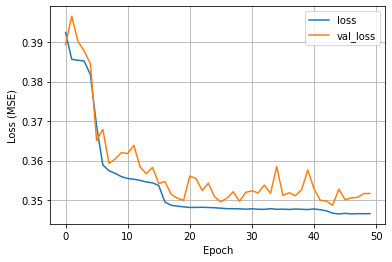

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
  predictions = model.predict(feature_test)

  predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.3516587260490218
MAE (Mean Absolute Error) 0.4014460728993812
r^2 score 0.6492497456755202
RMSE (Root Mean Squared Error 0.5930082006591662


# Deeper

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

history=deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
86487/86487 [==============================] - 96s 1ms/step - loss: 0.3645 - val_loss: 0.3528
Epoch 2/50
86487/86487 [==============================] - 95s 1ms/step - loss: 0.3500 - val_loss: 0.3575
Epoch 3/50
86487/86487 [==============================] - 96s 1ms/step - loss: 0.3491 - val_loss: 0.3568
Epoch 4/50
86487/86487 [==============================] - 96s 1ms/step - loss: 0.3485 - val_loss: 0.3554
Epoch 5/50
86487/86487 [==============================] - 95s 1ms/step - loss: 0.3482 - val_loss: 0.3514
Epoch 6/50
86487/86487 [==============================] - 96s 1ms/step - loss: 0.3479 - val_loss: 0.3512
Epoch 7/50
86487/86487 [==============================] - 95s 1ms/step - loss: 0.3479 - val_loss: 0.3514
Epoch 8/50
86487/86487 [==============================] - 97s 1ms/step - loss: 0.3475 - val_loss: 0.3507
Epoch 9/50
86487/86487 [==============================] - 95s 1ms/step - loss: 0.3473 - val_loss: 0.3509
Epoch 10/50
86487/86487 [==============================

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.3474034698685978
MAE (Mean Absolute Error) 0.39841203417601373
r^2 score 0.6534940088686123
RMSE (Root Mean Squared Error 0.5894094246519967


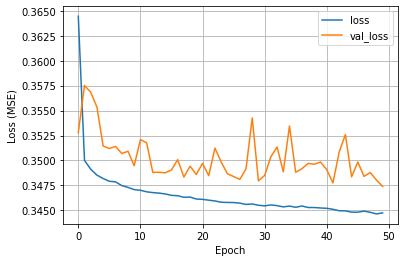

In [ ]:
plot_loss(history) # epoch vs loss graph

# Wider

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
86487/86487 [==============================] - 83s 961us/step - loss: 0.4035 - val_loss: 0.3955
Epoch 2/100
86487/86487 [==============================] - 84s 967us/step - loss: 0.3868 - val_loss: 0.3779
Epoch 3/100
86487/86487 [==============================] - 82s 948us/step - loss: 0.3611 - val_loss: 0.3635
Epoch 4/100
86487/86487 [==============================] - 84s 969us/step - loss: 0.3572 - val_loss: 0.3610
Epoch 5/100
86487/86487 [==============================] - 83s 962us/step - loss: 0.3566 - val_loss: 0.3565
Epoch 6/100
86487/86487 [==============================] - 82s 948us/step - loss: 0.3516 - val_loss: 0.3844
Epoch 7/100
86487/86487 [==============================] - 82s 950us/step - loss: 0.3495 - val_loss: 0.3610
Epoch 8/100
86487/86487 [==============================] - 84s 972us/step - loss: 0.3489 - val_loss: 0.3503
Epoch 9/100
86487/86487 [==============================] - 83s 962us/step - loss: 0.3487 - val_loss: 0.3528
Epoch 10/100
86487/86487 [==

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

In [ ]:
plot_loss(history_tuned) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

In [ ]:
plot_loss(history_rmsprop) # epoch vs loss graph